In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Actual employee number

Read data set and limit the data set to targeted groups.

In [3]:
data = pd.read_csv('new_all_business.csv')

data = data.loc[(data['Record Type'] != 'Verified')]
data.reset_index()

FileNotFoundError: [Errno 2] File b'new_all_business.csv' does not exist: b'new_all_business.csv'

# Closed business in different cities

Use the attribute 'City' from the data set and draw a bar graph by using the seaborn from matplot.

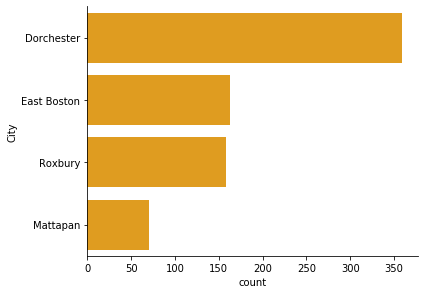

In [24]:

sns.catplot(y='City',
           kind='count',
            height=4, 
            aspect=1.5,
            #color=black
            order=data.City.value_counts().index,
            color = 'orange',
           data=data)


# Employee Size

Text(3.5500000000000043, 0.5, 'Count')

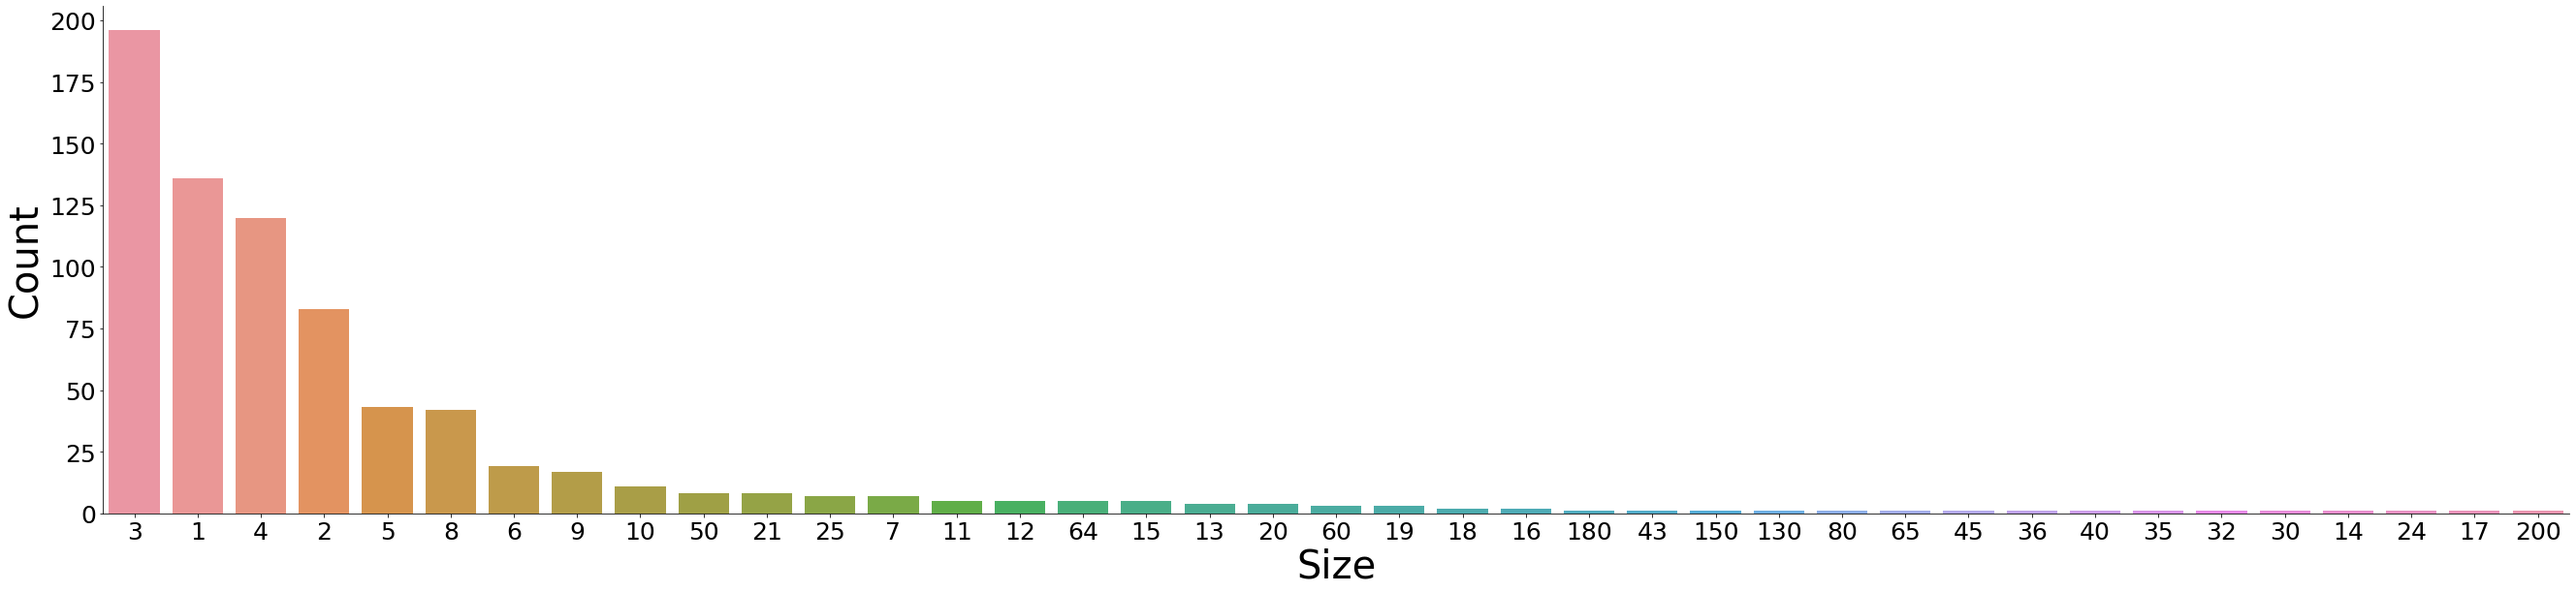

In [6]:
sns.catplot(x='Location Employee Size Actual',
           kind='count',
            height=8, 
            aspect=4.5,
            #color='black',
            order=data['Location Employee Size Actual'].value_counts().index,
           data=data)
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('Size', fontsize=40)
plt.ylabel('Count', fontsize=40)


# Gender

In [41]:
data2 = pd.read_csv('Combined Closed Business.csv')

closed_gender = data2[['Company Name','Executive Gender','City','Address']].dropna(axis=0,subset=['Executive Gender'])
closed_gender = closed_gender.reset_index()

print(closed_gender.shape)



(507, 5)


Spliting data into two dataframe with genders of executive ethnicity. 

In [43]:
Male_executive = []
Female_executive = []


for i in range(len(closed_gender)):
    if closed_gender['Executive Gender'][i] == 'Male' and closed_gender['Executive Gender'][i] != 'Female':
        Male_executive.append([(closed_gender['Company Name'][i]),(closed_gender['Executive Gender']),(closed_gender['City'][i]),(closed_gender['Address'][i])])
    elif closed_gender['Executive Gender'][i] == 'Female' and closed_gender['Executive Gender'][i] != 'Male':
        Female_executive.append([(closed_gender['Company Name'][i]),(closed_gender['Executive Gender']),(closed_gender['City'][i]),(closed_gender['Address'][i])])

Male_executive = pd.DataFrame(Male_executive)
print(Male_executive.shape)
Female_executive = pd.DataFrame(Female_executive)
print(Female_executive.shape)

(248, 4)
(259, 4)


Draw a pie graph based on the dataframes generated.

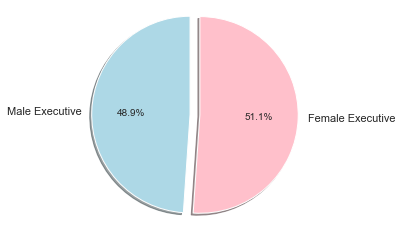

In [44]:
# Data to plot
labels = 'Male Executive','Female Executive'
sizes = [len(Male_executive),len(Female_executive)]
colors = ['lightblue','pink']

explode = (0, 0.1)


# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

# Ethnicity

In [6]:
data3 = pd.read_csv('clean_ethnicity.csv')
data3
data3.head()
data3.dtypes
data3.isnull().sum()
data3.shape

(484, 8)

Due to the diversity of ethnicities, we bin count the ethnicity and found the top 20 ethnicities in the data set and made a bar graph.

In [7]:
print(data3[:10])

   Unnamed: 0  index                   Company Name Executive Ethnicity  \
0           0     17                235 Media Group      Western Europe   
1           1     29                42nd Estate LLC    Eastern European   
2           2     68                  A & G Systems            Hispanic   
3           3     69        A & J Fields Promotions      Western Europe   
4           4     99     AAA Birthday Magicians Svc      Western Europe   
5           5    108          ABC Auto Glass Repair            Hispanic   
6           6    157             ADCI International      Western Europe   
7           7    162              ADT Home Security      Western Europe   
8           8    165  Advanced Physical Therapy Ctr    Eastern European   
9           9    172        Aeronatutics Commission      Western Europe   

          City                 Address State  ZIP Code  
0   Dorchester        235 Minot St # 3    MA      2124  
1   Dorchester         47 Roseclair St    MA      2125  
2  

We kept "Uncoded" because we realized that the data set did not contain Americans, and the uncoded people were the biggest group here. We suspect that "Uncoded" might be Americans. 

Text(3.6750000000000043, 0.5, 'Count')

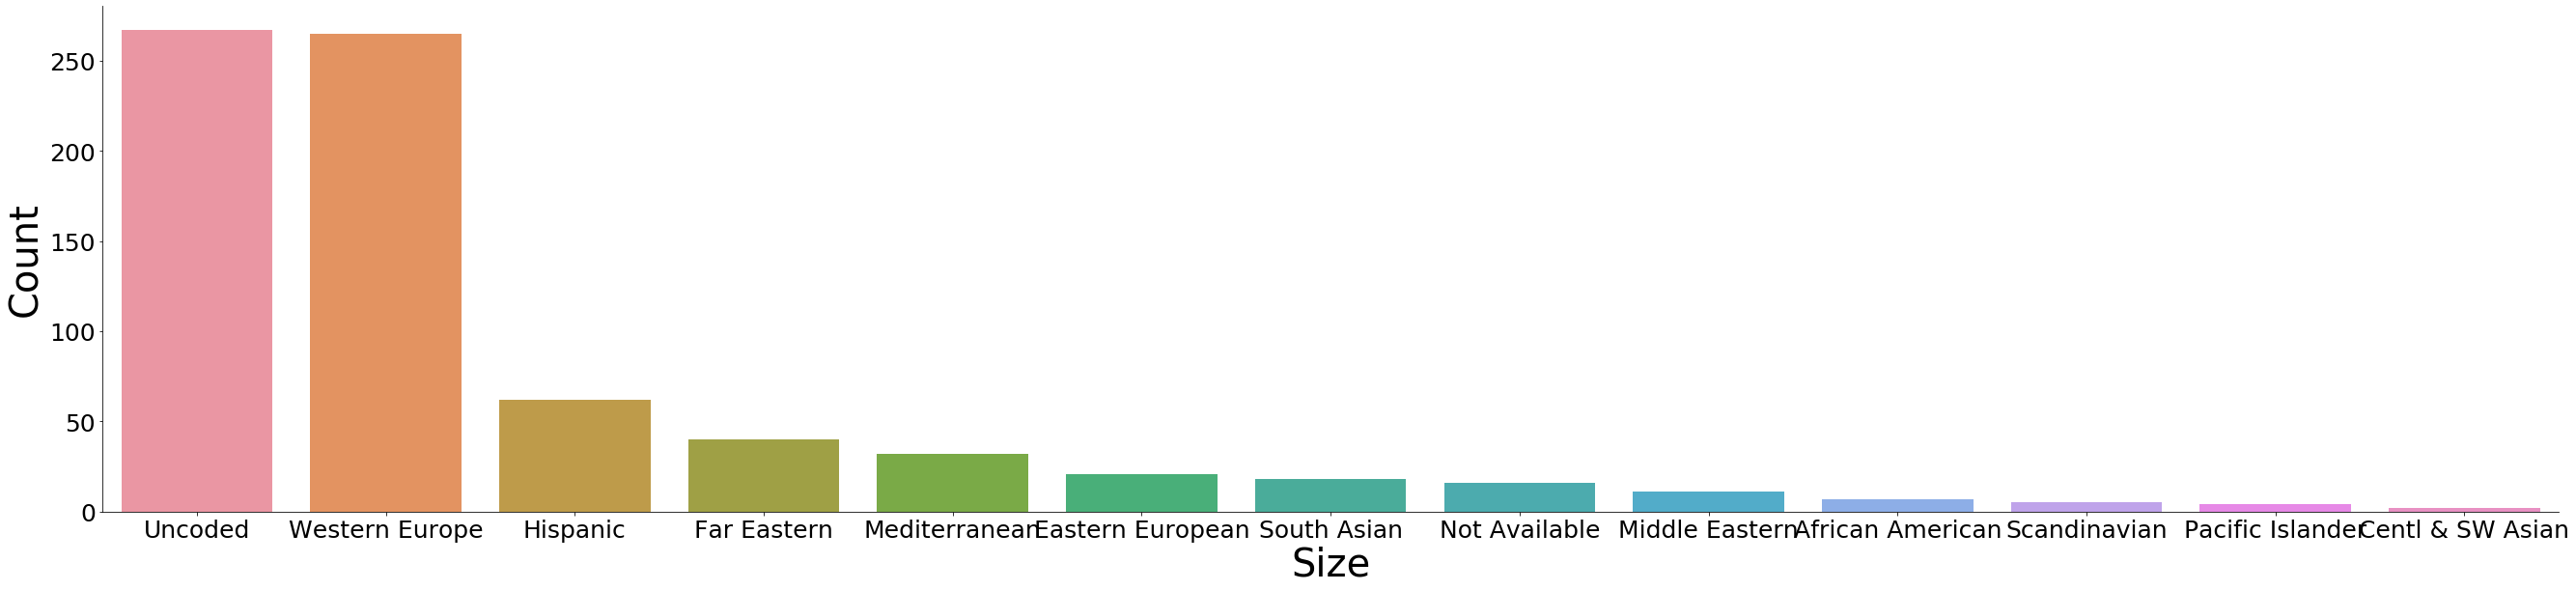

In [8]:
sns.catplot(x='Executive Ethnicity',
           kind='count',
            height=8, 
            aspect=4.5,
            #color='black',
            order=data['Executive Ethnicity'].value_counts().index,
           data=data)
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('Size', fontsize=40)
plt.ylabel('Count', fontsize=40)

In [11]:
without_uncoded = data3.loc[(data3['Executive Ethnicity'] != 'Uncoded')]
print(without_uncoded.shape)

(484, 8)


We tried two different ways to plot the bar graph. 

[Text(0, 0, 'Western Europe'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'Far Eastern'),
 Text(0, 0, 'Mediterranean'),
 Text(0, 0, 'Eastern European'),
 Text(0, 0, 'South Asian'),
 Text(0, 0, 'Not Available'),
 Text(0, 0, 'Middle Eastern'),
 Text(0, 0, 'African American'),
 Text(0, 0, 'Scandinavian'),
 Text(0, 0, 'Pacific Islander'),
 Text(0, 0, 'Centl & SW Asian')]

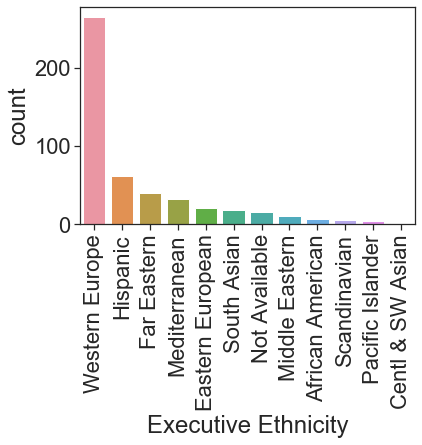

In [12]:

sns.set(style="ticks", color_codes=True, font_scale = 2, )
Eth_plot = sns.countplot(without_uncoded['Executive Ethnicity'], order=without_uncoded['Executive Ethnicity'].value_counts().index)



Eth_plot.set_xticklabels(Eth_plot.get_xticklabels(), rotation=90)


# Worst business type City wise

In [195]:
data4 = pd.read_csv('new_all_business.csv')
data4 = data4.loc[(data4['Record Type'] != 'Verified')]
data4 = data4[['Company Name','SIC Code 1 Description','City','Address']].dropna(axis=0, subset=['SIC Code 1 Description'])
data4.reset_index()
print(data4.shape)

(751, 4)


From the data description online, we found that the "SIC Code 1 Description" had the information about the business type. Since the diversity for business type was also too big, we again picked top 20 types of businesses that were closed in 2019. 

In [172]:

hold = data4['SIC Code 1 Description'].value_counts()
xxx = pd.DataFrame(hold)
print(xxx.shape)
print(xxx)

(207, 1)
                                         SIC Code 1 Description
Physicians & Surgeons                                       138
Dentists                                                     66
Nurses-Practitioners                                         51
Restaurants                                                  45
Counselors                                                   17
Real Estate                                                  15
Social Workers                                               14
Beauty Salons                                                14
Churches                                                     12
Cellular Telephones (Services)                               11
Attorneys                                                    10
Truck Renting & Leasing                                       9
Banks                                                         9
Airline Companies                                             9
Barbers                        

We only used the first 20 type of business type.

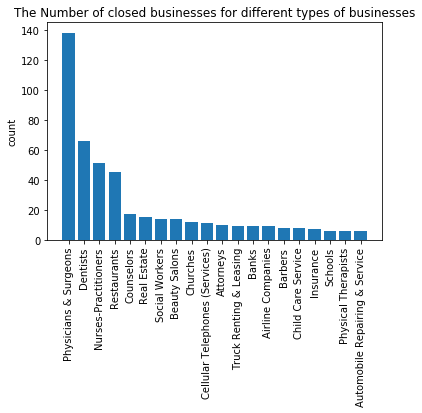

In [4]:
objects = ('Physicians & Surgeons','Dentists','Nurses-Practitioners','Restaurants','Counselors','Real Estate','Social Workers','Beauty Salons','Churches','Cellular Telephones (Services)','Attorneys','Truck Renting & Leasing','Banks','Airline Companies','Barbers','Child Care Service','Insurance','Schools','Physical Therapists','Automobile Repairing & Service')
y_pos = np.arange(len(objects))
performance = [138, 66, 51, 45, 17, 15, 14, 14, 12, 11, 10, 9, 9, 9, 8, 8, 7, 6, 6, 6]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.title('The Number of closed businesses for different types of businesses')

plt.show()

# Worst Neighborhood

In [185]:
data5 = data[['Company Name','SIC Code 1 Description','Neighborhood','Address']].dropna(axis=0, subset=['Neighborhood'])
data5.reset_index()
print(data5.shape)


(640, 4)


The bin was made based on the neighborhoods that were recorded in the dataet. 

In [178]:
hold2 = data5['Neighborhood'].value_counts()
hold2 = pd.DataFrame(hold2)
print(hold2.shape)
hold2.head

(29, 1)


<bound method NDFrame.head of                                       Neighborhood
Central Maverick Square-Paris Street            93
Neponset                                        65
Columbia Point                                  55
Uphams Corner-Jones Hill                        50
Lower Roxbury                                   39
Dudley-Brunswick King                           35
Egleston Square                                 33
Washington Park                                 32
Meeting House Hill                              29
Bowdoin North-Mount Bowdoin                     25
Sav-Mor                                         24
Mattapan Square                                 22
Jeffries Point                                  20
West Codman Hill-West Lower Mills               17
Southern Mattapan                               17
Fields Corner East                              14
Franklin Field North                            13
Fields Corner West                              10
H

In [181]:
Neighborhood = ('Central Maverick Square-Paris Street', 'Neponset', 'Columbia Point', 'Uphams Corner-Jones Hill ', 'Lower Roxbury', 'Dudley-Brunswick King', 'Egleston Square', 'Washington Park', 'Meeting House Hill', 'Bowdoin North-Mount Bowdoin', 'Sav-Mor', 'Mattapan Square', 'Jeffries Point', 'West Codman Hill-West Lower Mills', 'Southern Mattapan', 'Fields Corner East', 'Franklin Field North', 'Fields Corner West', 'Highland Park','Wellington Hill')

count = [93,65,55,50,39,35,33,32,29,25,24,22,20,17,17,14,13,10,9,8]


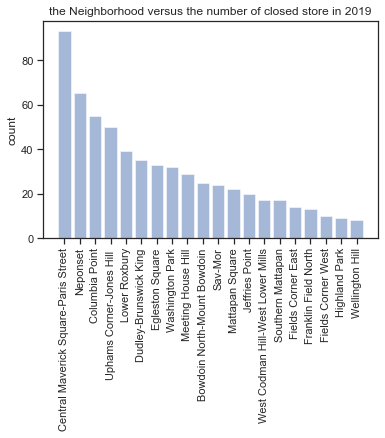

In [186]:
y_pos = np.arange(len(Neighborhood))

plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, Neighborhood)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.title('the Neighborhood versus the number of closed store in 2019')

plt.show()

# Average rent expense in each city

Pick out all the business in the specific four areas. 

In [205]:
city = pd.read_csv('new_all_business_cleaned.csv')
city = city.loc[(city['Record Type'] != 'Verified')]
city = city[['City', 'Rent Expenses']]
city.reset_index()


mattapan = city.loc[(city['City'] == 'Mattapan')]
E_Boston = city.loc[(city['City'] == 'East Boston')]
Roxbury = city.loc[(city['City'] == 'Roxbury') | (city['City'] == 'West Roxbury')]
Dorchester = city.loc[(city['City'] == 'Dorchester')]




Find the average home present in these area by using the sum of all rent expenses in these cloased small companies and the number of closed businesses in there area. 

In [222]:
'''the mean of the rent expense in differnt cities'''
Av_mattapan = sum(list(mattapan['Rent Expenses'])) / len(mattapan)
Av_E_Boston = sum(list(E_Boston['Rent Expenses'])) / len(E_Boston)
Av_Roxbury = sum(list(Roxbury['Rent Expenses'])) / len(Roxbury)
Av_Dorchester = sum(list(Dorchester['Rent Expenses']))  / len(Dorchester)


In [248]:
places = ['Dorchester','East Boston', 'Roxbury','mattapan' ]
price = [Av_Dorchester,Av_E_Boston, Av_Roxbury, Av_mattapan]


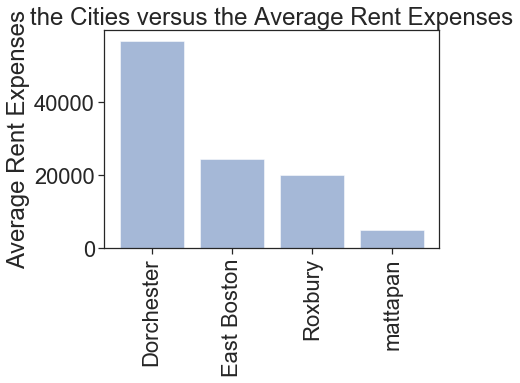

In [247]:
y_pos = np.arange(len(places))

plt.bar(y_pos, price, align='center', alpha=0.5 )
plt.xticks(y_pos, places)
plt.xticks(rotation=90)
plt.ylabel('Average Rent Expenses')
plt.title('the Cities versus the Average Rent Expenses')

plt.show()

# Company size (sqft)

In [5]:
Area = pd.read_csv('sqft_clean_data.csv')
Area = Area.loc[(Area['Record Type'] != 'Verified')]

Area.reset_index()



FileNotFoundError: [Errno 2] File b'sqft_clean_data.csv' does not exist: b'sqft_clean_data.csv'

[Text(0, 0, '1,500 - 2,499'),
 Text(0, 0, '1 - 1,499'),
 Text(0, 0, '2,500 - 4,999'),
 Text(0, 0, '5,000 - 9,999'),
 Text(0, 0, '10,000 - 19,999'),
 Text(0, 0, '40,000 - 99,999'),
 Text(0, 0, '20,000 - 39,999'),
 Text(0, 0, '100,000')]

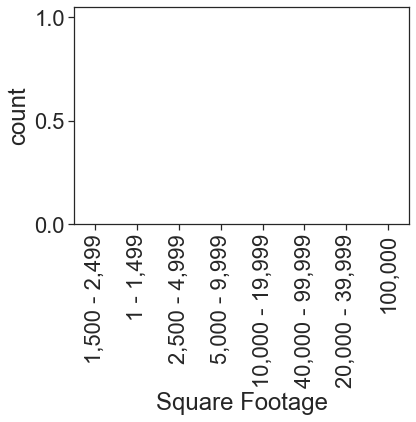

In [251]:

sns.set(style="ticks", color_codes=True, font_scale = 2)
Eth_plot = sns.countplot(Area['Square Footage'], order=data['Square Footage'].value_counts().index)

Eth_plot.set_xticklabels(Eth_plot.get_xticklabels(), rotation=90 )


[Text(0, 0, '1,500 - 2,499'),
 Text(0, 0, '1 - 1,499'),
 Text(0, 0, '2,500 - 4,999'),
 Text(0, 0, '5,000 - 9,999'),
 Text(0, 0, '10,000 - 19,999'),
 Text(0, 0, '40,000 - 99,999'),
 Text(0, 0, '20,000 - 39,999'),
 Text(0, 0, '100,000')]

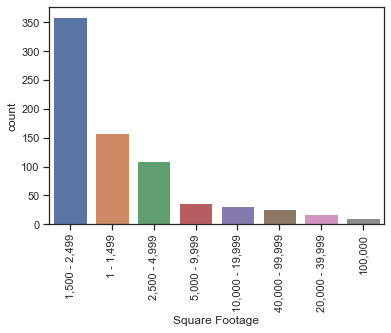

In [252]:

sns.set(style="ticks", color_codes=True, font_scale = 1)
Eth_plot = sns.countplot(data['Square Footage'], order=data['Square Footage'].value_counts().index)

Eth_plot.set_xticklabels(Eth_plot.get_xticklabels(), rotation=90)